# 1. What is any of this stuff anyway

In [1]:
import pandas as pd 
DATA_PATH = "../bengaliai-cv19/"

## 1.1. Class Map

In [2]:
class_map = pd.read_csv(DATA_PATH + "class_map.csv")

# General idea
print("===== Class Map HEAD =====")
print(class_map.head())
print("==========================")

# What are the types of components
print("===== COMPONENT TYPES =====")
print(class_map.component_type.unique())
print("==========================")

# Get a sense of the sizes of the component types
print("===== Lengths of component types =====")
def print_len(component_type):
    print(f"{component_type} has size {len(class_map.loc[class_map.component_type == component_type])}")

for comp_type in class_map.component_type.unique(): print_len(comp_type)
print("==========================")

===== Class Map HEAD =====
  component_type  label component
0  grapheme_root      0         ং
1  grapheme_root      1         ঃ
2  grapheme_root      2         অ
3  grapheme_root      3         আ
4  grapheme_root      4         ই
===== COMPONENT TYPES =====
['grapheme_root' 'vowel_diacritic' 'consonant_diacritic']
===== Lengths of component types =====
grapheme_root has size 168
vowel_diacritic has size 11
consonant_diacritic has size 7


The class map appears to have two main purposes:
* Define the expected numeric value for each symbol [helpful when defining output]
* Define the type of the symbol - there are only three types, but, the label resets from 0 for each type. grapheme_root 
  makes up most of the dataset. ~~This seems like it might cause for some skew unless the images are balanced
  accordingly.~~ - Every image seems to have a label for every component type (?)

## 1.2. Test & Train csv's

In [3]:
test_indices = pd.read_csv(DATA_PATH + "test.csv")
train_indices = pd.read_csv(DATA_PATH + "train.csv")

print("===== Train Indices HEAD =====")
print(train_indices.head())
print("==========================")

===== Train Indices HEAD =====
  image_id  grapheme_root  vowel_diacritic  consonant_diacritic grapheme
0  Train_0             15                9                    5   ক্ট্রো
1  Train_1            159                0                    0        হ
2  Train_2             22                3                    5     খ্রী
3  Train_3             53                2                    2     র্টি
4  Train_4             71                9                    5     থ্রো


So it appears that the image_id is something that will come into play when indexing the parquets. It seems that every image has 3 labels. 
Perhaps building three models will be the best  course of action to predict each label, or, perhaps, the labels are very 
related and would work better if one model handled them all. (As mentioned on kaggle, the actual character is not 
something to be used at all and is only here for reference). 

Another note: The 0 label indicates that it is not of a certain type of component. 

## 1.3. Sample Submission

In [4]:
sample_submission = pd.read_csv(DATA_PATH + "sample_submission.csv")

print("===== Train Indices HEAD =====")
print(sample_submission.head())
print("==========================")

===== Train Indices HEAD =====
                       row_id  target
0  Test_0_consonant_diacritic       0
1        Test_0_grapheme_root       0
2      Test_0_vowel_diacritic       0
3  Test_1_consonant_diacritic       0
4        Test_1_grapheme_root       0


As expected each image has three labels. 

# 2. Conditionals and Distributions

## 2.1 Reasoning

Given that there are so few classes in vowel diacritic and consonant diacritic, there is 
probably a good deal of information dependent 

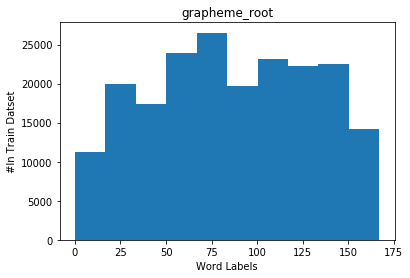

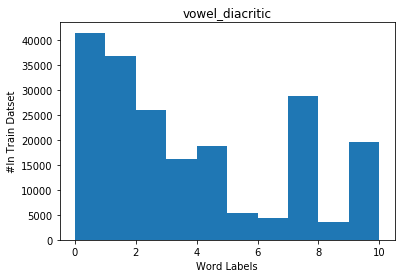

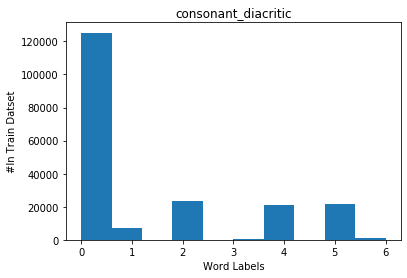

=====Grapheme Roots the are also the 2nd Consonant Diacritic =====
[107  29  43  71]


In [5]:
import matplotlib.pyplot as plt

train_data = pd.read_csv(DATA_PATH + "train.csv")
def plot_hist(data, title):
    plt.hist(data)
    plt.title(title)
    plt.xlabel("Word Labels")
    plt.ylabel("#In Train Datset")
    plt.show()

plot_hist(train_data.grapheme_root, "grapheme_root")
plot_hist(train_data.vowel_diacritic, "vowel_diacritic")
plot_hist(train_data.consonant_diacritic, "consonant_diacritic")

print("=====Grapheme Roots the are also the 2nd Consonant Diacritic =====")
print(train_data.loc[train_data.consonant_diacritic == 3].grapheme_root.unique())
print("===================================")

## 2.2. Building A Probability Distribution

$ G_r \in \{0, ..., 167\} $ : Random Variable Representing the Grapheme Root of a training item
 
$ D_c \in \{ 0, ...., 10 \} $ : Random Variable Representing the Consonant Diacritic of a training item

$ D_v \in \{ 0, ...., 6 \} $ : Random Variable Representing the Vowel Diacritic of a training item

$$ P(G_r = g_r | D_c = d_c) = \frac{ \#\{g_r \cap d_c \}}{\#\{d_c\}} $$

In [ ]:
def probability_of_g_r_given_d_c(g_r, d_c):
    no_d_c_and_g_r = len(train_data.loc[(train_data.grapheme_root == g_r) & (train_data.consonant_diacritic == d_c)])
    no_d_c = len(train_data.loc[train_data.consonant_diacritic == d_c])
    return  no_d_c_and_g_r / no_d_c

probability_dist = []
for d_c in train_data.consonant_diacritic.unique():
    for g_r in train_data.grapheme_root.unique():
        probability_dist.append(probability_of_g_r_given_d_c(g_r, d_c))

probability_dist.sort()
print(probability_dist)

probability_dist.sort(reverse=True)
print(probability_dist[10:])

We can draw from this that inferring the actual $ G_r $ based on the $ D_c $ variable is difficult, however,
realizing what $ G_r $ is not the correct answer is quite possible if $ D_c $ can be inferred.

So that raises the question: can $ D_c $ be inferred independently of other variables? 
 

In [ ]:
print(class_map.loc[class_map.component_type == "consonant_diacritic"])

It seems quite possible. Based on the unicode they seem somewhat similar